# Netflix Data Exploration Business Case - Data cleaning

## Importing the required libraries or packages for EDA:

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install numpy pandas seaborn matplotlib


In [3]:
import numpy as np
import pandas as pd
# Importing numpy and pandas packages
import seaborn as sns
import matplotlib.pyplot as plt
# Importing matplotlib and seaborn for graphs
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("netflix_titles.csv")
# storing the netflix data in to df 

#### knowning about data and attributes:

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4306,s4307,Movie,ROMA,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira","Mexico, United States","December 14, 2018",2018,R,135 min,"Dramas, Independent Movies, International Movies","Director Alfonso Cuarón delivers a vivid, emot..."
2094,s2095,Movie,Lingua Franca,Isabel Sandoval,"Eamon Farren, Lev Gorn, PJ Boudousqué, Lynn Co...","United States, Philippines","August 26, 2020",2019,TV-MA,94 min,"Dramas, International Movies, LGBTQ Movies",An undocumented trans woman seeking legal stat...
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
7525,s7526,Movie,Mune: Guardian of the Moon,"Alexandre Heboyan, Benoît Philippon","Joshua J. Ballard, Nicole Provost, Trevor Deva...",France,"January 26, 2018",2014,PG,85 min,Children & Family Movies,"When the old guardian of the moon retires, the..."
2067,s2068,Movie,Fate/Grand Order -First Order-,Hitoshi Namba,"Nobunaga Shimazaki, Rie Takahashi, Ayako Kawas...",Japan,"September 1, 2020",2016,TV-14,72 min,"Action & Adventure, Anime Features, Internatio...",Discovering that humanity is facing extinction...


## Basic Analysis and Data cleaning:

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Un-nesting the columns:

Un-nesting the director, cast, listed_in, country columns

In [10]:
df_director_r = pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_director = df_director_r.stack().reset_index()
df_director.drop('level_1', axis = 1, inplace = True)
df_director.rename(columns ={0:'director'}, inplace = True)
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [11]:
df_cast_r = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_cast = df_cast_r.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [12]:
df_country_r = pd.DataFrame(df['country'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_country = df_country_r.stack().reset_index()
df_country.drop('level_1', axis = 1, inplace = True)
df_country.rename(columns ={0:'country'}, inplace = True)
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [13]:
df_listed_in_r = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])

df_listed_in = df_listed_in_r.stack().reset_index()
df_listed_in.drop('level_1', axis = 1, inplace = True)
df_listed_in.rename(columns ={0:'listed_in'}, inplace = True)
df_listed_in.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [14]:
df_new = df_director.merge(df_cast, how ='inner', on ='title')
df_new = df_new.merge(df_country, how ='inner', on ='title')
df_new = df_new.merge(df_listed_in, how ='inner', on ='title')
df_new

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
df_final = df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration','description']] , how = 'inner', on = 'title')

df_final.sample(10)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
20894,Word of Honor,Gary Sing,Gong Jun,nan,International TV Shows,s833,TV Show,"May 28, 2021",2021,TV-14,1 Season,A disillusioned royal magistrate sets out for ...
127412,Jonas,Lô Politi,Ariclenes Barroso,Brazil,Dramas,s5589,Movie,"February 26, 2017",2015,TV-MA,97 min,"During Carnival, two teens from different clas..."
196094,The Unknown Girl,Luc Dardenne,Jérémie Renier,Belgium,Dramas,s8547,Movie,"December 12, 2017",2016,TV-MA,106 min,A guilt-ridden doctor in a Belgian town tries ...
89318,DJ Cinderella,Bruno Garotti,Letícia Pedro,Brazil,Comedies,s3748,Movie,"June 14, 2019",2019,TV-PG,95 min,Fiercely independent and disillusioned with lo...
180018,Runaway Bride,Garry Marshall,Julia Roberts,United States,Comedies,s7904,Movie,"December 1, 2020",1999,PG,116 min,Sparks fly when a newspaper columnist writes a...
44109,La Révolution,nan,Lionel Erdogan,France,TV Dramas,s1840,TV Show,"October 16, 2020",2020,TV-MA,1 Season,"In a reimagined history, a mysterious disease ..."
119340,Blazing Transfer Students,nan,Takahiro Hamada,Japan,International TV Shows,s5174,TV Show,"November 10, 2017",2017,TV-MA,1 Season,"Featuring the boys of Johnny's West, a gang of..."
1697,Saved by the Bell,nan,Mario Lopez,United States,TV Comedies,s68,TV Show,"September 15, 2021",1994,TV-PG,9 Seasons,"From middle school to college, best friends Za..."
61037,The Eddy,Alan Poul,Benjamin Biolay,United Kingdom,TV Dramas,s2554,TV Show,"May 8, 2020",2020,TV-MA,1 Season,The owner of a Paris jazz club gets tangled up...
91537,Crime Diaries: Night Out,Felipe Cano,Laura Osma,Mexico,Crime TV Shows,s3861,TV Show,"May 3, 2019",2019,TV-MA,1 Season,"After going to a Halloween party, college stud..."


Replacing the nan values in the cast, director columns with unknown Actor and unknown director repectively

In [17]:
df_final['cast'].replace (['nan'], ['Unknown Actor'], inplace = True)
df_final['director'].replace (['nan'], ['Unknown Director'], inplace = True)

df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [18]:
df_final.isnull().sum()

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [19]:
df_final[df_final['duration'].isnull()]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


some values in duration column was misplaced to rating column, those values replaced to their respective positions

In [20]:
df_final.loc[126582,'duration'] = '74 min'
df_final.loc[131648,'duration'] = '84 min'
df_final.loc[131782,'duration'] = '66 min'

In [21]:
df_final.loc[[126582,131648,131782]]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,74 min,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,84 min,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,66 min,The comic puts his trademark hilarious/thought...


Handling with rating column:

In [22]:
df_final['rating'].replace({'74 min':'NR'})
df_final['rating'].replace({'84 min':'NR'})
df_final['rating'].replace({'66 min':'NR'})
df_final.loc[[126582,131648,131782]]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,74 min,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,84 min,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,66 min,The comic puts his trademark hilarious/thought...


In [23]:
x = pd.DataFrame(df_final.loc[df_final['rating'].isnull()])
x['rating'] = 'NR'
x

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
135172,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Oprah Winfrey,nan,Movies,s5990,Movie,"January 26, 2017",2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...
135173,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Ava DuVernay,nan,Movies,s5990,Movie,"January 26, 2017",2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...
154424,Gargantia on the Verdurous Planet,Unknown Director,Kaito Ishikawa,Japan,Anime Series,s6828,TV Show,"December 1, 2016",2013,NR,1 Season,"After falling through a wormhole, a space-dwel..."
154425,Gargantia on the Verdurous Planet,Unknown Director,Kaito Ishikawa,Japan,International TV Shows,s6828,TV Show,"December 1, 2016",2013,NR,1 Season,"After falling through a wormhole, a space-dwel..."
154426,Gargantia on the Verdurous Planet,Unknown Director,Hisako Kanemoto,Japan,Anime Series,s6828,TV Show,"December 1, 2016",2013,NR,1 Season,"After falling through a wormhole, a space-dwel..."
...,...,...,...,...,...,...,...,...,...,...,...,...
172016,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172017,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172018,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172019,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."


In [24]:
df_final[df_final['rating'].isnull()].index

Index([135172, 135173, 154424, 154425, 154426, 154427, 154428, 154429, 154430,
       154431, 154432, 154433, 154434, 154435, 154436, 154437, 154438, 154439,
       154440, 154441, 154442, 154443, 154444, 154445, 154446, 154447, 154448,
       154449, 154450, 154451, 154452, 154453, 154454, 154455, 154456, 154457,
       154458, 154459, 154460, 154461, 154462, 154463, 154464, 154465, 154466,
       154467, 166841, 166842, 166843, 166844, 166845, 166846, 166847, 166848,
       166849, 166850, 166851, 166852, 166853, 166854, 172014, 172015, 172016,
       172017, 172018, 172019, 172020],
      dtype='int64')

In [25]:
df_final = df_final.drop([135172, 135173, 154424, 154425, 154426, 154427, 154428, 154429, 154430,
       154431, 154432, 154433, 154434, 154435, 154436, 154437, 154438, 154439,
       154440, 154441, 154442, 154443, 154444, 154445, 154446, 154447, 154448,
       154449, 154450, 154451, 154452, 154453, 154454, 154455, 154456, 154457,
       154458, 154459, 154460, 154461, 154462, 154463, 154464, 154465, 154466,
       154467, 166841, 166842, 166843, 166844, 166845, 166846, 166847, 166848,
       166849, 166850, 166851, 166852, 166853, 166854, 172014, 172015, 172016,
       172017, 172018, 172019, 172020], axis = 0)
df_final = df_final.drop([126582, 131648, 131782], axis = 0)

In [26]:
df_final = pd.concat([df_final, x], axis = 0)

In [27]:
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
172016,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172017,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172018,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172019,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."


In [28]:
df_final.loc[df_final['rating'] == 'NR']

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
134888,(T)ERROR,Lyric R. Cabral,Unknown Actor,United States,Documentaries,s5972,Movie,"June 30, 2016",2015,NR,84 min,This real-life look at FBI counterterrorism op...
134889,(T)ERROR,David Felix Sutcliffe,Unknown Actor,United States,Documentaries,s5972,Movie,"June 30, 2016",2015,NR,84 min,This real-life look at FBI counterterrorism op...
135142,13 Cameras,Victor Zarcoff,PJ McCabe,United States,Horror Movies,s5988,Movie,"August 13, 2016",2015,NR,90 min,Young parents-to-be Claire and Ryan move into ...
135143,13 Cameras,Victor Zarcoff,PJ McCabe,United States,Independent Movies,s5988,Movie,"August 13, 2016",2015,NR,90 min,Young parents-to-be Claire and Ryan move into ...
135144,13 Cameras,Victor Zarcoff,PJ McCabe,United States,Thrillers,s5988,Movie,"August 13, 2016",2015,NR,90 min,Young parents-to-be Claire and Ryan move into ...
...,...,...,...,...,...,...,...,...,...,...,...,...
172016,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172017,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172018,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."
172019,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,Dramas,s7538,Movie,"March 1, 2017",2015,NR,115 min,"Amid the chaos and horror of World War II, a c..."


In [29]:
df_final.isnull().sum()

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
description       0
dtype: int64

##### Filling the NaN values in the 'date_added' cloumn with repected release year mode of date added values 

In [30]:
df_year = pd.DataFrame(df_final.groupby(['release_year']).apply(lambda x: x['date_added'].mode())).reset_index()
df_year.drop('level_1', axis = 1, inplace = True)
df_year

,release_year,date_added
0,1925,"December 30, 2018"
1,1942,"March 31, 2017"
2,1943,"March 31, 2017"
3,1944,"March 31, 2017"
4,1945,"March 31, 2017"
...,...,...
76,2017,"September 1, 2017"
77,2018,"November 30, 2018"
78,2019,"October 4, 2019"
79,2020,"May 8, 2020"


In [31]:
df_date_added_na = pd.DataFrame(df_final.loc[df_final['date_added'].isnull()])
df_date_added_na 

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
136940,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136941,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136942,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136943,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136944,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186965,The Adventures of Figaro Pho,Unknown Director,Charlotte Hamlyn,Australia,TV Comedies,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
186966,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,Kids' TV,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
186967,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,TV Comedies,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
186968,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,Australia,Kids' TV,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."


In [32]:
merged_df = pd.merge(df_date_added_na , df_year, on='release_year', how='left')
merged_df.columns


Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added_x', 'release_year', 'rating', 'duration', 'description',
       'date_added_y'],
      dtype='object')

In [33]:
merged_df.sample(5)

,title,director,cast,country,listed_in,show_id,type,date_added_x,release_year,rating,duration,description,date_added_y
65,Gunslinger Girl,Unknown Director,Masashi Ebara,Japan,Crime TV Shows,s6902,TV Show,NaN,2008,TV-14,2 Seasons,"On the surface, the Social Welfare Agency appe...","July 1, 2019"
138,Red vs. Blue,Unknown Director,Dan Godwin,United States,TV Comedies,s7848,TV Show,NaN,2015,NR,13 Seasons,"This parody of first-person shooter games, mil...","July 1, 2016"
98,La Familia P. Luche,Unknown Director,Luis Manuel Ávila,United States,TV Comedies,s7255,TV Show,NaN,2012,TV-14,3 Seasons,"This irreverent sitcom featues Ludovico, Feder...","August 1, 2017"
152,The Adventures of Figaro Pho,Unknown Director,Craig Behenna,Australia,TV Comedies,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ...","July 1, 2016"
133,Red vs. Blue,Unknown Director,Joel Heyman,United States,TV Sci-Fi & Fantasy,s7848,TV Show,NaN,2015,NR,13 Seasons,"This parody of first-person shooter games, mil...","July 1, 2016"


In [34]:
merged_df['date_added_x'] = merged_df['date_added_y'].fillna(merged_df['date_added_x'])
merged_df.drop('date_added_y', axis=1, inplace=True)

In [35]:
merged_df.shape

(159, 12)

In [36]:
merged_df.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added_x', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [37]:
merged_df

,title,director,cast,country,listed_in,show_id,type,date_added_x,release_year,rating,duration,description
0,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,"April 9, 2019",2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
1,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,"April 9, 2019",2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
2,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,"April 9, 2019",2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
3,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,"April 9, 2019",2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
4,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,"April 9, 2019",2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
154,The Adventures of Figaro Pho,Unknown Director,Charlotte Hamlyn,Australia,TV Comedies,s8183,TV Show,"July 1, 2016",2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
155,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,Kids' TV,s8183,TV Show,"July 1, 2016",2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
156,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,TV Comedies,s8183,TV Show,"July 1, 2016",2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."
157,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,Australia,Kids' TV,s8183,TV Show,"July 1, 2016",2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ..."


In [38]:
merged_df.rename(columns ={'date_added_x' :'date_added' }, inplace = True)
merged_df.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [39]:
df_final.dropna(subset=['date_added'], inplace=True)

In [40]:
df_final.shape

(201904, 12)

In [41]:
df_final = pd.concat([df_final, merged_df ], ignore_index = True, axis = 0)

In [42]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [43]:
df_final.shape

(202063, 12)

In [44]:
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [45]:
df_final.isnull().sum()

title           0
director        0
cast            0
country         0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

##### Adding of new columns with existing columns

In [46]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'], format='mixed')
df_final["year_added"] = df_final['date_added'].dt.year
df_final["year_added"] = df_final["year_added"].astype("Int64")
df_final["month_added"] = df_final['date_added'].dt.month
df_final["month_added"] = df_final["month_added"].astype("Int64")
df_final["day_added"] = df_final['date_added'].dt.day
df_final["day_added"] = df_final["day_added"].astype("Int64")
df_final.sample(5)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,day_added
45514,All Because of You,Adrian Teh,Amerul Affendi,Malaysia,Action & Adventure,s1903,Movie,2020-10-01,2020,TV-PG,102 min,"After falling for a guest, an unsuspecting hot...",2020,10,1
118109,Seoul Searching,Benson Lee,Esteban Ahn,South Korea,International Movies,s5125,Movie,2017-12-15,2015,TV-MA,109 min,Teens of Korean descent who were born and rais...,2017,12,15
64435,The Trial,Stefano Lodovichi,Tommaso Ragno,Italy,International TV Shows,s2697,TV Show,2020-04-10,2019,TV-MA,1 Season,The murder of a teen girl impacts a public pro...,2020,4,10
139070,Another Forever,Juan Zapata,Daniela Escobar,Brazil,International Movies,s6171,Movie,2017-03-21,2016,TV-PG,72 min,"Overtaken by the death of her beloved, a griev...",2017,3,21
134940,Çok Filim Hareketler Bunlar,Ozan Açıktan,Aydan Taş,Turkey,International Movies,s5977,Movie,2017-03-10,2010,TV-MA,99 min,Vignettes of the summer holidays follow vacati...,2017,3,10


In [47]:
df_final.shape

(202063, 15)

### Handling null values in the 'country' columns:
The missing values in country column is 1st replced by director country, further left cells replaced with actors country.

In [48]:
df_final.loc[df_final['country'] == 'nan']

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,day_added
58,Ganglands,Julien Leclercq,Sami Bouajila,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
59,Ganglands,Julien Leclercq,Sami Bouajila,nan,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
60,Ganglands,Julien Leclercq,Sami Bouajila,nan,TV Action & Adventure,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
61,Ganglands,Julien Leclercq,Tracy Gotoas,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
62,Ganglands,Julien Leclercq,Tracy Gotoas,nan,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201780,Zombie Dumb,Unknown Director,Unknown Actor,nan,TV Comedies,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",2019,7,1
201837,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Oprah Winfrey,nan,Movies,s5990,Movie,2017-01-26,2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...,2017,1,26
201838,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Ava DuVernay,nan,Movies,s5990,Movie,2017-01-26,2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...,2017,1,26
201992,Kikoriki,Unknown Director,Igor Dmitriev,nan,Kids' TV,s7197,TV Show,2021-07-01,2010,TV-Y,2 Seasons,A wacky rabbit and his gang of animal pals hav...,2021,7,1


In [49]:
df_final['director'].unique()

array(['Kirsten Johnson', 'Unknown Director', 'Julien Leclercq', ...,
       'Peter Hewitt', 'Mozez Singh', 'Alessandro Pepe'], dtype=object)

In [50]:
number_of_directors = df_final['director'].nunique()
number_of_directors 

5120

In [51]:
df_director_country = pd.DataFrame(df_final.groupby(['director']).apply(lambda x: x['country'].mode())).reset_index()
df_director_country.drop('level_1', axis = 1, inplace = True)
df_director_country.rename(columns = {'country' : 'director_country'}, inplace = True)
df_director_country

,director,director_country
0,Aaron Moorhead,United States
1,Aaron Woolf,Venezuela
2,Aaron Woolf,United States
3,Abbas Alibhai Burmawalla,India
4,Abdullah Al Noor,Bangladesh
...,...,...
6545,Ísold Uggadóttir,Sweden
6546,Ísold Uggadóttir,Iceland
6547,Óskar Thór Axelsson,Iceland
6548,Ömer Faruk Sorak,Turkey


In [52]:
df_director_country1 = df_director_country.drop_duplicates(subset = ['director'])
df_director_country1

,director,director_country
0,Aaron Moorhead,United States
1,Aaron Woolf,Venezuela
3,Abbas Alibhai Burmawalla,India
4,Abdullah Al Noor,Bangladesh
5,Abhinav Shiv Tiwari,India
...,...,...
6543,Çagan Irmak,Turkey
6544,Ísold Uggadóttir,Belgium
6547,Óskar Thór Axelsson,Iceland
6548,Ömer Faruk Sorak,Turkey


In [53]:
df_country_na = pd.DataFrame(df_final.loc[df_final['country']== 'nan'])
df_country_na.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,day_added
58,Ganglands,Julien Leclercq,Sami Bouajila,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
59,Ganglands,Julien Leclercq,Sami Bouajila,nan,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
60,Ganglands,Julien Leclercq,Sami Bouajila,nan,TV Action & Adventure,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
61,Ganglands,Julien Leclercq,Tracy Gotoas,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24
62,Ganglands,Julien Leclercq,Tracy Gotoas,nan,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24


In [54]:
df_country_na.shape

(11898, 15)

In [55]:
merged_df1 = pd.merge(df_country_na , df_director_country1, on='director', how='left')
merged_df1.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'day_added', 'director_country'],
      dtype='object')

In [56]:
merged_df1.shape

(11898, 16)

In [57]:
df_country_na2 = merged_df1.loc[merged_df1['director_country']=='nan']
df_country_na2.shape

(5923, 16)

In [58]:
merged_df1.drop(columns = {'country'}, axis = 1, inplace = True)
merged_df1.rename(columns = {'director_country' : 'country'}, inplace = True)
merged_df1

,title,director,cast,listed_in,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,day_added,country
0,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24,France
1,Ganglands,Julien Leclercq,Sami Bouajila,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24,France
2,Ganglands,Julien Leclercq,Sami Bouajila,TV Action & Adventure,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24,France
3,Ganglands,Julien Leclercq,Tracy Gotoas,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24,France
4,Ganglands,Julien Leclercq,Tracy Gotoas,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,24,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,Zombie Dumb,Unknown Director,Unknown Actor,TV Comedies,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",2019,7,1,United States
11894,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Oprah Winfrey,Movies,s5990,Movie,2017-01-26,2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...,2017,1,26,United States
11895,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Ava DuVernay,Movies,s5990,Movie,2017-01-26,2017,NR,37 min,Oprah Winfrey sits down with director Ava DuVe...,2017,1,26,United States
11896,Kikoriki,Unknown Director,Igor Dmitriev,Kids' TV,s7197,TV Show,2021-07-01,2010,TV-Y,2 Seasons,A wacky rabbit and his gang of animal pals hav...,2021,7,1,United States


In [59]:
df_final.shape

(202063, 15)

In [60]:
df_final = pd.concat([df_final, merged_df1 ], ignore_index = True, axis = 0)
df_final.shape

(213961, 15)

In [61]:
df_final = df_final.drop(df_final.loc[df_final['country']== 'nan'].index, axis = 0)

In [62]:
df_final.shape

(196140, 15)

In [63]:
df_actor_country = pd.DataFrame(df_final.groupby(['cast']).apply(lambda x: x['country'].mode())).reset_index()
df_actor_country.drop('level_1', axis = 1, inplace = True)
df_actor_country.rename(columns = {'country' : 'actor_country'}, inplace = True)
df_actor_country

,cast,actor_country
0,Jr.,United States
1,"""Riley"" Lakdhar Dridi",France
2,'Najite Dede,Nigeria
3,2 Chainz,United States
4,2Mex,United States
...,...,...
47454,İbrahim Büyükak,Turkey
47455,İbrahim Çelikkol,Turkey
47456,Şahin Irmak,Turkey
47457,Şükrü Özyıldız,Turkey


In [64]:
df_actor_country1 = df_actor_country.drop_duplicates(subset = ['cast'])
df_actor_country1

,cast,actor_country
0,Jr.,United States
1,"""Riley"" Lakdhar Dridi",France
2,'Najite Dede,Nigeria
3,2 Chainz,United States
4,2Mex,United States
...,...,...
47454,İbrahim Büyükak,Turkey
47455,İbrahim Çelikkol,Turkey
47456,Şahin Irmak,Turkey
47457,Şükrü Özyıldız,Turkey


In [65]:
df_country_na2.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'day_added', 'director_country'],
      dtype='object')

In [66]:
merged_df2= pd.merge(df_country_na2 , df_actor_country1, on='cast', how='left')
merged_df2.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'day_added', 'director_country',
       'actor_country'],
      dtype='object')

In [67]:
merged_df2.shape

(5923, 17)

In [68]:
merged_df2.drop(columns = {'country'}, axis = 1, inplace = True)
merged_df2.drop(columns = {'director_country'}, axis = 1, inplace = True)
merged_df2.rename(columns = {'actor_country' : 'country'}, inplace = True)


In [69]:
merged_df2['country'] = merged_df2['country'].fillna(method = 'bfill', axis=0)
merged_df2['country'] = merged_df2['country'].fillna(method = 'ffill', axis=0)
merged_df2.isna().sum()

title           0
director        0
cast            0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
year_added      0
month_added     0
day_added       0
country         0
dtype: int64

In [70]:
df_final = pd.concat([df_final, merged_df2 ], ignore_index = True, axis = 0)
df_final.shape

(202063, 15)

# Netflix Data Exploration Analysis

In [71]:
netflix_df = df_final 
# renamed df_final
netflix_df.shape

(202063, 15)

In [72]:
netflix_df.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'day_added'],
      dtype='object')

To make the column names more meaningful, "listed_in" has been changed to
"genres".

In [73]:
netflix_df.rename(columns = {"listed_in":"genre"},inplace= True)
netflix_df.columns

Index(['title', 'director', 'cast', 'country', 'genre', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'day_added'],
      dtype='object')

In [74]:
netflix_df=netflix_df.drop_duplicates()
netflix_df.shape

(202056, 15)

In [75]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202056 entries, 0 to 202062
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         202056 non-null  object        
 1   director      202056 non-null  object        
 2   cast          202056 non-null  object        
 3   country       202056 non-null  object        
 4   genre         202056 non-null  object        
 5   show_id       202056 non-null  object        
 6   type          202056 non-null  object        
 7   date_added    202056 non-null  datetime64[ns]
 8   release_year  202056 non-null  int64         
 9   rating        202056 non-null  object        
 10  duration      202056 non-null  object        
 11  description   202056 non-null  object        
 12  year_added    202056 non-null  Int64         
 13  month_added   202056 non-null  Int64         
 14  day_added     202056 non-null  Int64         
dtypes: Int64(3), datetime6

### Values counts of each category (Graphical and Non-graphical analysis)

In [76]:
netflix_df.nunique()

title            8804
director         5120
cast            39296
country           197
genre              73
show_id          8804
type                2
date_added       1714
release_year       74
rating             14
duration          220
description      8772
year_added         14
month_added        12
day_added          31
dtype: int64

In [77]:
netflix_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [78]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [79]:
netflix_df['genre'].value_counts()

genre
 International Movies    27138
Dramas                   19654
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: count, Length: 73, dtype: int64

In [80]:
netflix_df['genre'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', ' Romantic TV Shows', ' TV Comedies', 'Dramas',
       ' Independent Movies', ' International Movies', 'British TV Shows',
       ' Reality TV', 'Comedies', ' Dramas', 'TV Comedies',
       'Crime TV Shows', ' Spanish-Language TV Shows',
       ' TV Action & Adventure', ' Romantic Movies', 'Docuseries',
       ' International TV Shows', 'Horror Movies', ' Sci-Fi & Fantasy',
       'Thrillers', "Kids' TV", 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Thrillers', ' Anime Features', 'Reality TV', ' Docuseries',
       'Anime Series', ' Comedies', 'Sci-Fi & Fantasy',
       'Children & Family Movies', ' Music & Musicals', " Kids' TV",
       ' Sports Movies', ' Korean TV Shows', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies', ' Children & Family Movies',
       ' Faith & Spirituality', ' LGBTQ Movies', 'TV Dramas',
       ' TV Horror', 'St

In [81]:
netflix_df['genre'].nunique()

73

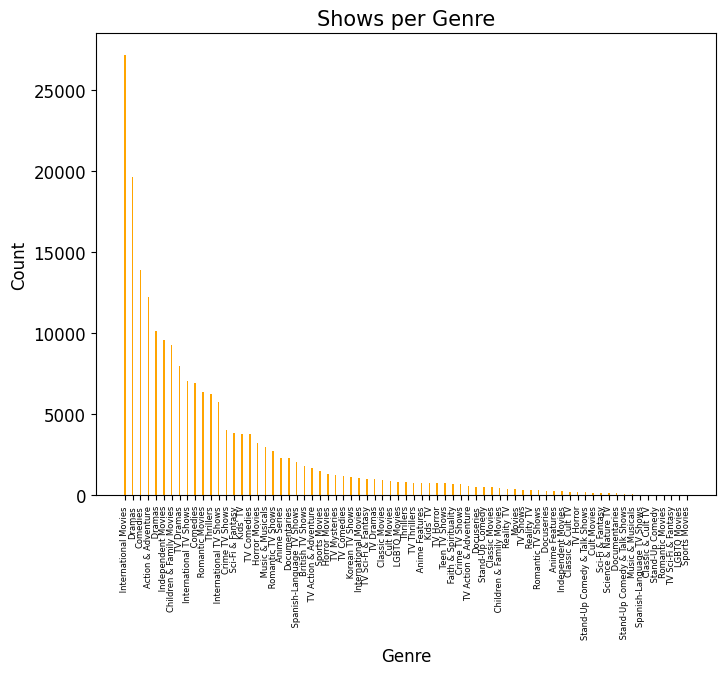

In [82]:
x_bar=netflix_df['genre'].value_counts().index
y_bar=netflix_df['genre'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(x_bar,y_bar,width=0.2,color='orange')
plt.title('Shows per Genre',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation = 90, fontsize=6)
plt.yticks(fontsize=12)
plt.show()

#### Inference
Netflix offers a diverse selection of shows across 73 different genres.
In all genres, International Movie genre has high numbers of shows and folloed by Dramas, Comedies, Action & Adventure.


## Comparision of TV shows vs Movies

Movies and TV Shows distribution

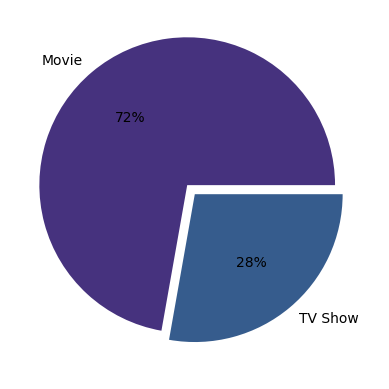

In [83]:
data = netflix_df.groupby("type")['type'].count()
explode=(0.08,0)
labels = ['Movie', 'TV Show']
colors = sns.color_palette("viridis")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

#### Inference:
Netflix has 72% of its content as movies.
Movies are clearly more popular on Netflix than TV shows.

### Does Netflix has more focus on TV Shows than movies in recent years

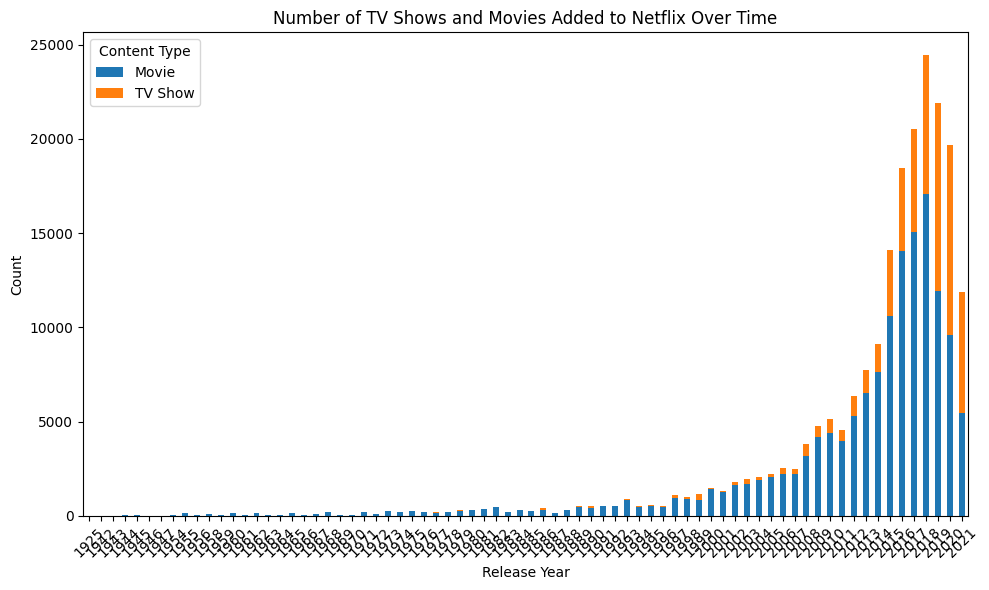

In [84]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of TV Shows and Movies Added to Netflix Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

#### Inference:
> Yes, Netflix has more focus on TV shows than movies in recent years. From past 7yrs onwards number of Tv shows increased.

#### The number of movies produced in each country and Top 10 countries

In [85]:

movies_per_country = netflix_df[netflix_df['type'] == 'Movie'].groupby('country').size().reset_index(name = 'movie_count')
tv_shows_per_country = netflix_df[netflix_df['type'] == 'TV Show'].groupby('country').size().reset_index(name = 'tv_shows_count')
top_countries_m = movies_per_country.sort_values(by='movie_count', ascending = False)
top_countries_m['country'] = top_countries_m['country'].str.lower().str.strip()
top_countries_m_agg = top_countries_m.groupby('country').sum().reset_index()
top_countries_m_agg = top_countries_m_agg.sort_values(by='movie_count', ascending=False)
top_10_countries_m = top_countries_m_agg.head(10)
top_10_countries_m 

,country,movie_count
111,united states,47645
42,india,22374
110,united kingdom,8722
33,france,6803
19,canada,5826
50,japan,4014
98,spain,3523
35,germany,3501
74,nigeria,3040
22,china,2388


In [86]:
top_countries_t = tv_shows_per_country.sort_values(by='tv_shows_count', ascending = False)
top_countries_t['country'] = top_countries_t['country'].str.lower().str.strip()
top_countries_t_agg = top_countries_t.groupby('country').sum().reset_index()
top_countries_t_agg = top_countries_t_agg.sort_values(by='tv_shows_count', ascending=False)
top_10_countries_t = top_countries_t_agg.head(10)
top_10_countries_t

,country,tv_shows_count
64,united states,18414
31,japan,5203
63,united kingdom,4385
53,south korea,3757
9,canada,2180
39,mexico,2030
54,spain,1882
58,taiwan,1812
20,france,1676
26,india,1558


Text(0.5, 0.98, 'Shows per Country')

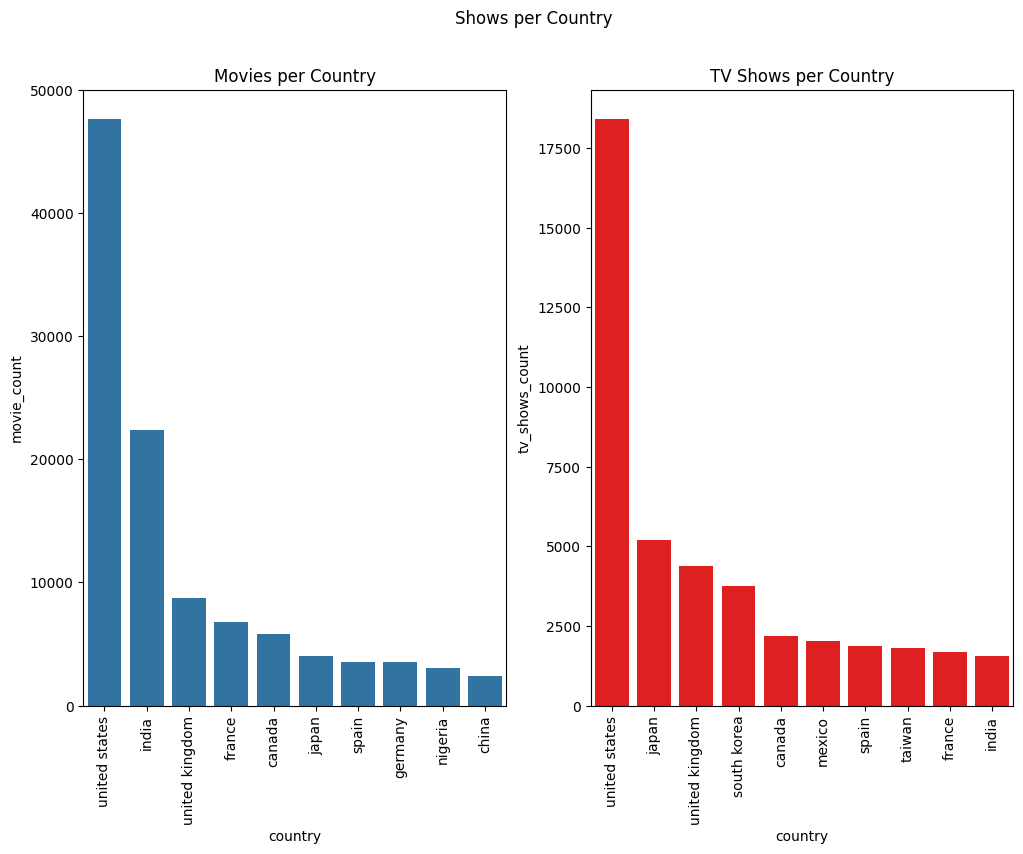

In [87]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.barplot(x='country', y='movie_count', data=top_10_countries_m)
plt.title('Movies per Country')
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(1, 2, 2)
sns.barplot(x='country', y='tv_shows_count', data=top_10_countries_t, color='red')
plt.title('TV Shows per Country')
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
fig.suptitle('Shows per Country')

#### Inference:
> The United States stands out as the leading producer of both movies and TV shows among the top countries. This suggests a strong influence of American media in the global entertainment industry.
> 
> India follows the United States as the second-highest producer of movies and least producer of tv-shows in top 10 countries.
>
> United Kingdom feature prominently in both movie and TV show production.
>
> south Korea feature prominently in TV show production.

## The best time to launch a TV show

Creating a new column i.e. Weekday_added

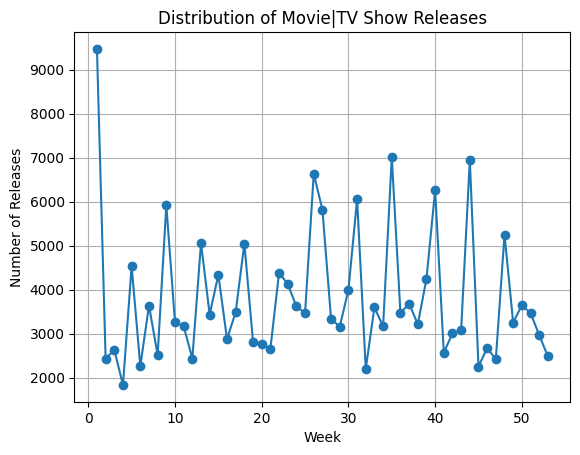

In [88]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.loc[:, 'release_week'] = netflix_df['date_added'].dt.isocalendar().week
release_counts = netflix_df.groupby('release_week').size()
release_counts.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Number of Releases')
plt.title('Distribution of Movie|TV Show Releases')
plt.grid(True)
plt.show()


#### Inference:
>The 35th week and follwed by 45th and 27th week as the prime release periods.


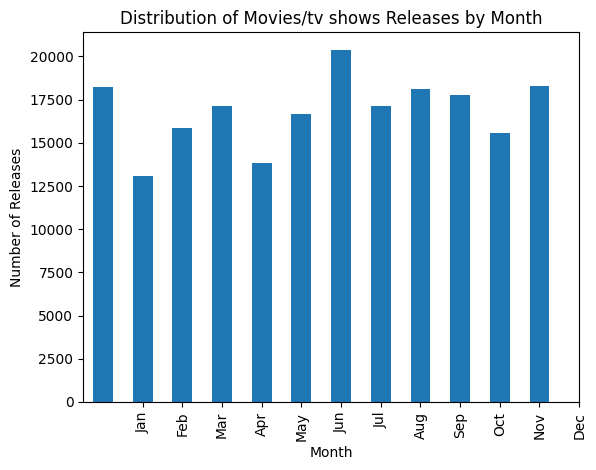

In [89]:
release_counts_by_month = netflix_df.groupby('month_added').size()
release_counts_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Distribution of Movies/tv shows Releases by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### Inference:
>July sees a lot of TV shows being released as compared to other months.

## Analysis of actors/directors of different types of shows/movies

#### The top 10 directors who have appeared in most movies or TV shows

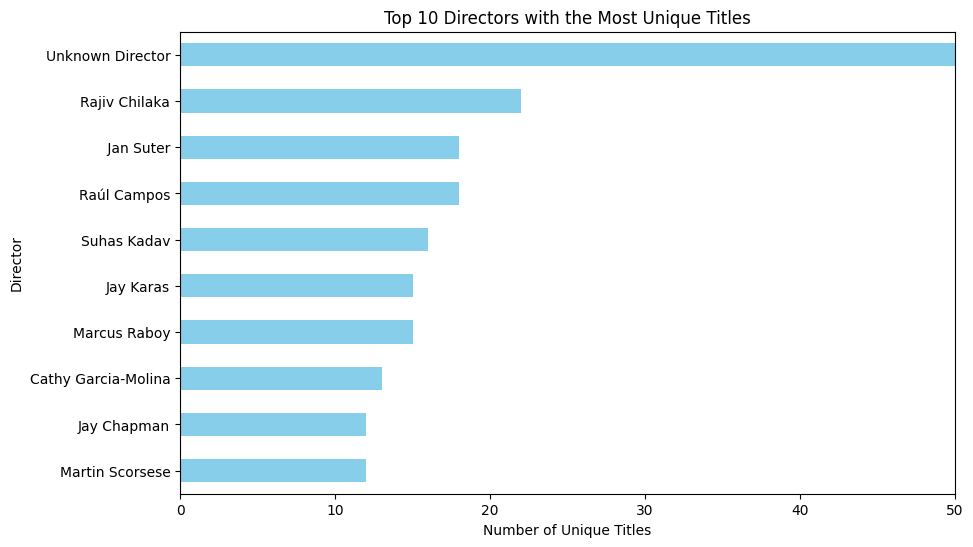

In [90]:
director_unique_titles = netflix_df[netflix_df['type'] == 'Movie'].groupby('director')['title'].nunique()
top_10_directors = director_unique_titles.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Director')
plt.xlim(0, 50)
plt.title('Top 10 Directors with the Most Unique Titles')
plt.gca().invert_yaxis()  
plt.show()

#### Inference:
> Rajiv Chilaka has diretecd more shows and got the top position. Jan Suter and raul Campos are in the following positions.

###  The top 10 actors who have appeared in most movies or TV shows

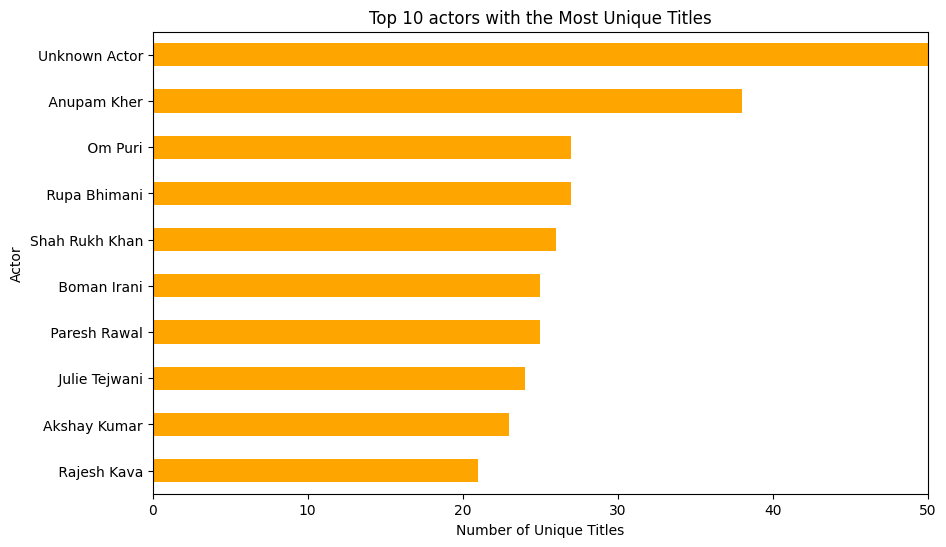

In [91]:
actor_unique_titles = netflix_df[netflix_df['type'] == 'Movie'].groupby('cast')['title'].nunique()
top_10_actors = actor_unique_titles.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='barh', color='orange')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Actor')
plt.xlim(0, 50)
plt.title('Top 10 actors with the Most Unique Titles')
plt.gca().invert_yaxis()  
plt.show()

#### Inference:
> Anupam Kher has acted in  more shows. Om Puri and Rupa Bhimani are follows.

### "Which Genre of Movies Are More Popular or Produced More Frequently?"

In [92]:
!pip install wordcloud

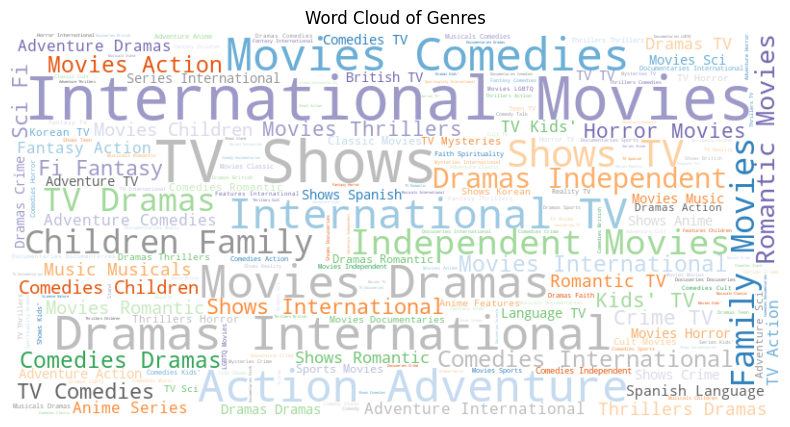

In [93]:
# from wordcloud import WordCloud
all_genres = ','.join(netflix_df['genre'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = 'tab20c').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

#### Inference:
> Prominent genres include “Movies,” “Action,” “Family,” and “International”.
>
> Other genres like “Adventure,” “Comedies,” “Dramas,” and “Romantic” are also visible in data or on netflix.

### Find After how many days the movie will be added to Netflix after the release of-


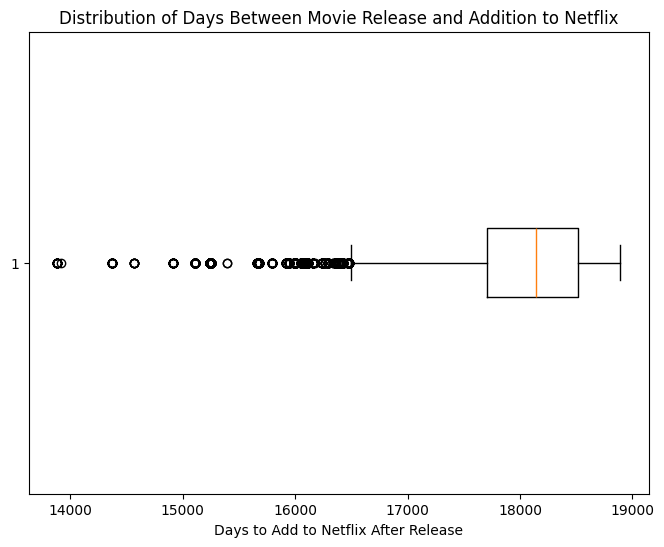

In [94]:
netflix_df['release_year'] = pd.to_datetime(netflix_df['release_year'])
netflix_df['days_to_add'] = (netflix_df['date_added'] - netflix_df['release_year']).dt.days
mode_days_to_add = netflix_df['days_to_add'].mode()[0]
plt.figure(figsize=(8, 6))
plt.boxplot(netflix_df['days_to_add'], vert=False)
plt.xlabel('Days to Add to Netflix After Release')
plt.title('Distribution of Days Between Movie Release and Addition to Netflix')
plt.show()

#### Inference:
> Around 18200 days between movie release and addition to Netflix. This represents the typical time lag between the two events.
>
> Most of the movies and tv shows releases in between 17700 days to 18600 days(approximately).
>
> Some movies/shows are added to Netflix unusually quickly compared to the rest.